# __Statistics for Data Science with Python Final Assignment__

### Let's import the required libraries for our project

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

### Read csv file from URL

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


##  Become familiar with the dataset

### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Generate Descriptive Statistics and Visualizations

## Question 1 : For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

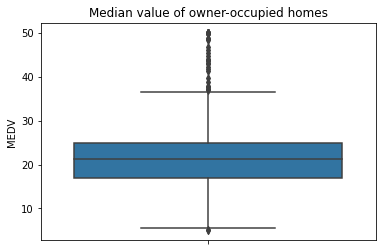

In [9]:
ax = sns.boxplot(y = 'MEDV',data = boston_df)
ax.set_title('Median value of owner-occupied homes')

### Boxplot above shows the median value of owner occupied homes together with outliers.

## Question 2 : Provide a  bar plot for the Charles river variable



Text(0.5, 1.0, 'Charles river variable')

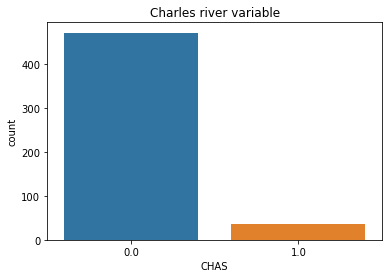

In [19]:
ax = sns.countplot(x = 'CHAS', data = boston_df)
ax.set_title('Charles river variable')


### Bar plot shows that the majority of the houses are not Charles river

## Question 3 : Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

### First we will group the datas into categories as
        - 35 years and younger
        - Between 35 and 70 years
        - 70 years and above

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes grouped on different age groups')

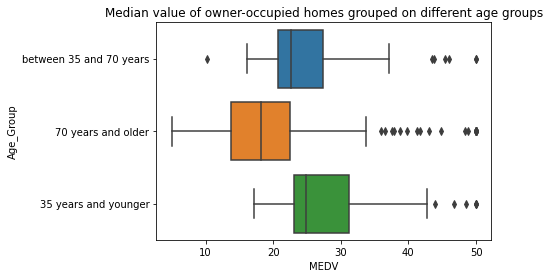

In [15]:
ax= sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax.set_title('Median value of owner-occupied homes grouped on different age groups')

### The boxplot shows that the median value of owner occupied homes is on average higher for younger population.

## Question 4 : Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



Text(0.5, 1.0, 'Nitric oxide concentration vs proportion of non-retail business acres per town')

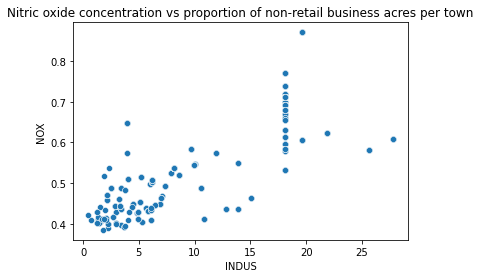

In [16]:
ax= sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax.set_title('Nitric oxide concentration vs proportion of non-retail business acres per town')

### Values in bottom left corner shows a strong relationship between Nitric oxide concentration and the proportion of non rental business acres per town.

## Question 5 : Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio by town')

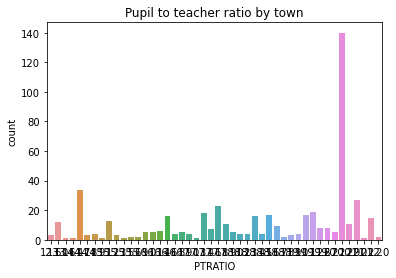

In [17]:
ax = sns.countplot(x = 'PTRATIO', data = boston_df)
ax.set_title('Pupil to teacher ratio by town')

## Question 6 : Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### State  hypothesis:

H_0 : There's no significant difference in median value between houses bounded and not bounded by the Charles River

H_1 : There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [8]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'Bound'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'No_Bound'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Bound
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Bound
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Bound
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Bound
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Bound


In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'Bound']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'No_Bound']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

### Since the p-value is less than 0.05, we reject the Null Hypothesis, There's a significant difference in median value between houses bounded and not bounded by the Charles River.



## Question 7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### State  hypothesis:

H_0 : There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

H_1 : There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [11]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


### Given p-value is less than 0.05, we fail to accept the Null Hypothesis,as there is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

## Question 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### State Hypothesis:
H_0: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

H_1: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


(0.7636514469209149, 7.913361061240043e-98)

### Since  p-value less than 0.05, we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town.



## Question 9: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [14]:
# x is input variable or independent variable
x = boston_df['DIS']
# y is target/dependent variable
y = boston_df['MEDV']
# addd an intercept (beta_0) to our model
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predisction = model.predict(x)
model.summary()


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        17:22:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes